In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [2]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
#from FlyMH import FlyMH
from csMALA import csMALA
from likelihood_functions import Norm_lkhd
from likelihood_functions import Norm_2_d_lkhd

In [3]:
npr.seed(1)
N = 10000
#dataType = "Gaussian"
dataType = "logNormal"
if dataType == "Gaussian":
    dataset = npr.randn(N)
elif dataType == "logNormal":
    dataset = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(dataset)
realStd = np.std(dataset)
print(f"Mean of dataset = {realMean}")
print(f"Std of dataset = {realStd}")
MAP = np.array([realMean, realStd])

norm_lkhd = Norm_lkhd()

Mean of dataset = 1.6734578765190937
Std of dataset = 2.2995441701932298


In [4]:
def plt_samples(dataset):
    # Create a jointplot with fading datapoints
    sns.jointplot(x=dataset[:, 0], y=dataset[:, 1], kind='hex', cmap='Blues', alpha=1)
    
    # Show the plot
    plt.show()


In [5]:
def compute_autocorrelation(arr):
    n = len(arr)
    mean = np.mean(arr)
    autocorr = np.correlate(arr - mean, arr - mean, mode='full')
    autocorr = autocorr[n-1:] / autocorr[n-1]
    return autocorr


In [6]:
from scipy.stats import norm

def compute_bvm(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    se = std / np.sqrt(n)
    
    # Compute the Bernstein-Von Mises approximation
    bvm = norm(loc=mean, scale=se)
    
    return bvm


In [12]:
import numpy as np

def create_sample(data, b, c):
    # Discard the first b of elements
    data = data[b:]
    
    # Select every c datapoint
    data = data[::c]
    
    return data


## VanillaMH

In [ ]:
# #Long VanillaMH run
# T = 100000
# norm_lkhd = Norm_lkhd()
# ref_vanillMH = MetropolisHastings(dataset, norm_lkhd)
# ref_vanillMH.run(T,MAP, dataset)
# ref_run = ref_vanillMH.S
# ref_run_mean = np.mean(ref_run[:,0])
# ref_run_std = np.std(ref_run[:,0])
# plt_samples(ref_run)  
# print(np.mean(ref_vanillMH.accept))
# print(ref_vanillMH.alpha)

Execution time: 2.991029 seconds


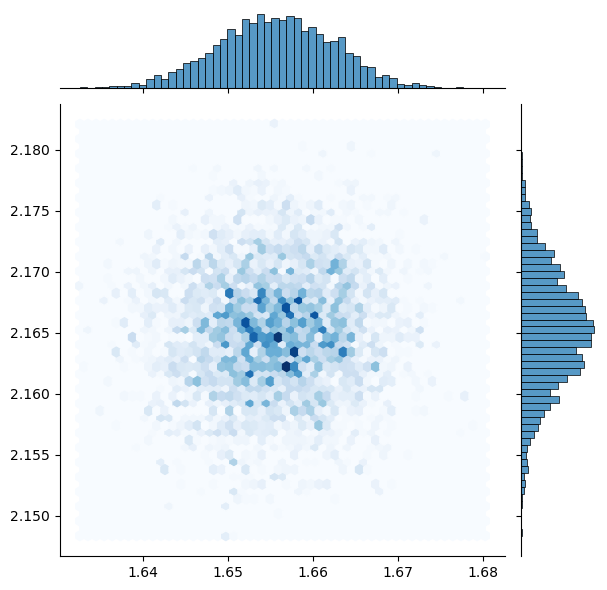

In [7]:
T = 10000
test_vanillMH = MetropolisHastings(dataset, norm_lkhd)

start_time = time.time()
test_vanillMH.run(T, MAP, dataset)
vanillMH_run = test_vanillMH.S
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
plt_samples(vanillMH_run)

## ConsensusMH

[array([[1.65566056, 2.16504885],
       [1.65523631, 2.16416684],
       [1.65601474, 2.16449836],
       ...,
       [1.68795107, 2.1468332 ],
       [1.68628094, 2.14536745],
       [1.68810919, 2.1451077 ]]), array([[1.65566056, 2.16504885],
       [1.65581301, 2.1651955 ],
       [1.6562907 , 2.16542342],
       ...,
       [1.64291118, 2.18591409],
       [1.64299705, 2.18593067],
       [1.64505854, 2.1868216 ]]), array([[1.65566056, 2.16504885],
       [1.65368435, 2.16649551],
       [1.65386854, 2.16616899],
       ...,
       [1.6629971 , 2.15659091],
       [1.66239159, 2.15670596],
       [1.66239159, 2.15670596]]), array([[1.65566056, 2.16504885],
       [1.65765413, 2.16415889],
       [1.65765711, 2.1635836 ],
       ...,
       [1.65458118, 2.15411919],
       [1.65504042, 2.15166211],
       [1.6526696 , 2.15094958]])]
Execution time: 4.320444 seconds


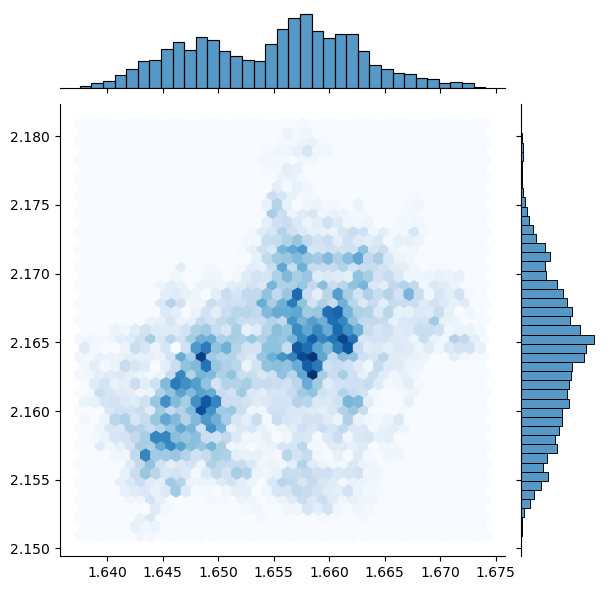

In [ ]:
num_batches = 4
T = 10000

consMH = ConsensusMH(dataset, norm_lkhd, num_batches)

start_time = time.time()
consMH_run = consMH.run(T, MAP)
end_time = time.time()
ex_time_ConsMH = end_time - start_time
print(f"Execution time: {ex_time_ConsMH:.6f} seconds")
plt_samples(consMH_run)

## FlyMH


In [ ]:
# batch_percentage = 0.9
# T = 1000

# test_FlyMH = FlyMH(dataset = x, sample_fraction=batch_percentage)

# start_time = time.time()
# test_FlyMH_run = test_FlyMH.run(T, MAP)
# end_time = time.time()
# ex_time_FLYMH = end_time - start_time
# print(f"Execution time: {ex_time_FLYMH:.6f} seconds")
# plt_samples(test_FlyMH_run)

## MALA


In [8]:
batch_percentage = 1
T = 10000

test_MALA = csMALA(dataset, norm_lkhd, batch_percentage=batch_percentage)
test_MALA.corr_param = 0

start_time = time.time()
test_MALA.run(T, MAP)
end_time = time.time()
ex_time_MALA = end_time - start_time
test_MALA_samples = test_MALA.S
print(f"Execution time: {ex_time_MALA:.6f} seconds")
plt_samples(test_MALA_samples)

TypeError: Likelihood_function.comp_func_grad() takes 1 positional argument but 3 were given

## csMALA

Execution time: 19.484909 seconds


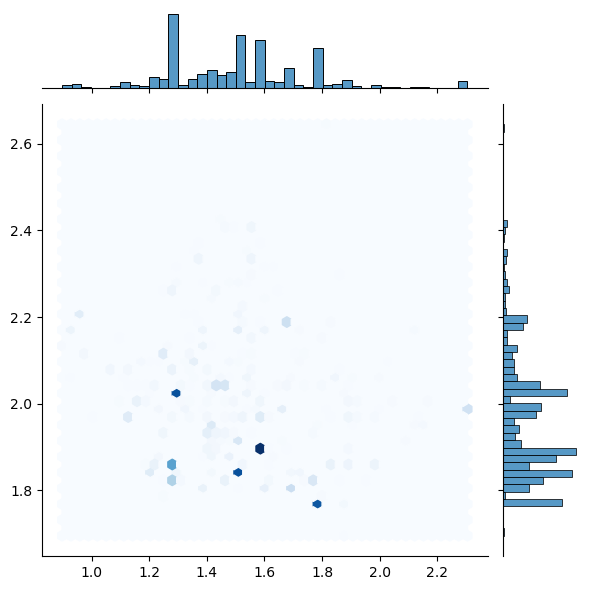

In [ ]:
batch_percentage = 0.1
T = 10000

test_csMALA = csMALA(dataset,norm_lkhd ,batch_percentage=batch_percentage)

start_time = time.time()
test_csMALA.run(T, MAP)
end_time = time.time()
ex_time_csMALA = end_time - start_time
test_csMALA_samples = test_csMALA.S
print(f"Execution time: {ex_time_csMALA:.6f} seconds")
plt_samples(test_csMALA_samples)

## New Dataset

 Try a dataset which consists of two normal distributions with different means
 - How much are the algortihms able to capture the two modes?

(array([  2.,   2.,   1.,   1.,   1.,   1.,   3.,   5.,   1.,   4.,  10.,
          8.,   8.,   9.,  13.,  26.,  27.,  28.,  21.,  36.,  43.,  63.,
         48.,  81.,  75.,  86., 107., 114., 115., 117., 144., 196., 167.,
        208., 187., 211., 248., 281., 296., 294., 297., 303., 316., 347.,
        322., 316., 292., 318., 296., 338., 314., 307., 295., 262., 231.,
        203., 241., 211., 184., 163., 142., 137., 132.,  88.,  84.,  81.,
         75.,  68.,  53.,  50.,  39.,  33.,  35.,  24.,  16.,  14.,  16.,
          7.,  18.,  11.,   6.,   5.,   5.,   5.,   2.,   2.,   1.,   3.,
          0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.36872888, -0.36062122, -0.35251356, -0.3444059 , -0.33629823,
        -0.32819057, -0.32008291, -0.31197525, -0.30386759, -0.29575993,
        -0.28765227, -0.2795446 , -0.27143694, -0.26332928, -0.25522162,
        -0.24711396, -0.2390063 , -0.23089864, -0.22279097, -0.21468331,
        -0.20657565, -0.19

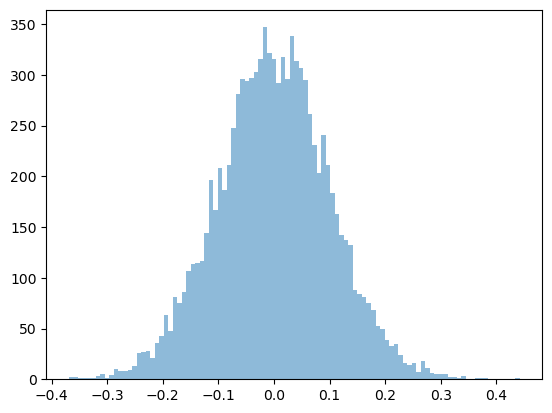

In [16]:
normal = npr.normal(0, 0.1, int(N)) 
plt.hist(normal, bins=100, alpha=0.5, label='Normal')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   3.,   2.,   5.,   6.,   7.,
          9.,  22.,  26.,  34.,  48.,  58.,  86., 133., 136., 181., 208.,
        233., 284., 279., 318., 350., 289., 309., 278., 290., 279., 204.,
        188., 169., 150., 100.,  85.,  59.,  49.,  34.,  33.,  25.,   8.,
         10.,   3.,   6.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,
          1.,   1.,   4.,   5.,   9.,   9.,  11.,  12.,  20.,  40.,  45.,
         61., 118., 126., 142., 159., 226., 226., 290., 302., 264., 327.,
        319., 314., 277., 304., 248., 227., 202., 159., 127., 106.,  86.,
         58.,  57.,  42.,  24.,  21.,   3.,  12.,   2.,   8.,   2.,   0.,
          2.]),
 array([-4.38321614, -4.2229778 , -4.06273946, -3.90250112, -3.74226278,
        -3.58202444, -3.4217861 , -3.26154776, -3.10130942, -2.94107108,
        -2.78083274, -2.6205944 , -2.46035606, -2.30011772, -2.13987938,
        -1.97964104, -1.8194027 , -1.65916436, -1.49892602, -1.33868768,
        -1.17844934, -1.01

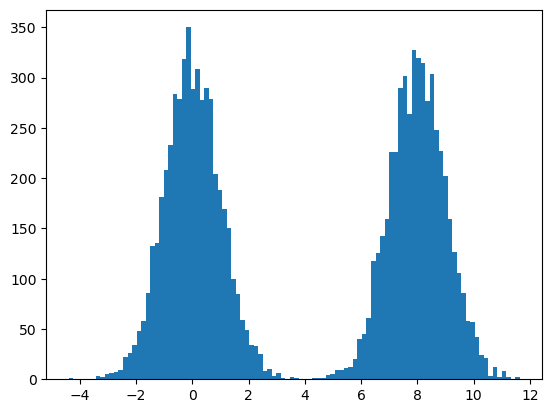

In [18]:
p =1/2
mu1 = 0
mu2 =8
N=10000
mu1_normal = npr.normal(mu1, 1, int(N/2)) 
mu2_normal = npr.normal(mu2, 1, int(N/2))

bimodal_data = np.concatenate((mu1_normal, mu2_normal))

plt.hist(bimodal_data, bins=100)

c:\Users\fynno\Desktop\bt_MCMC_big_data\MetropolisHastings.py:47: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(self.lkhd[i+1] - self.lkhd[i])


Execution time: 6.016935 seconds


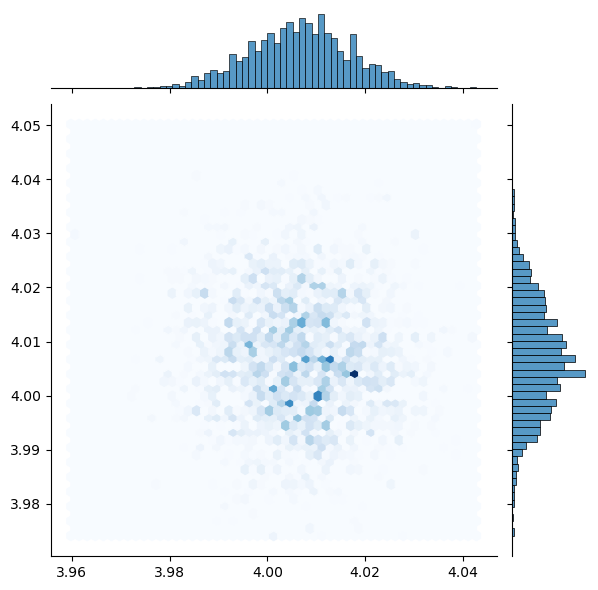

In [19]:
T = 100000
norm_2 = Norm_2_d_lkhd()
test_vanillMH = MetropolisHastings(bimodal_data, norm_2)
test_vanillMH.stepsize = 0.1
theta = np.array([0,4])
start_time = time.time()
test_vanillMH.run(T, theta, bimodal_data)
vanillMH_run = test_vanillMH.S
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
plt_samples(create_sample(vanillMH_run,10000, 10))